# IPSVIP - Data Science Intern - 2022

# Task1 : Age and Gender Classification

##  Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
import random
from PIL import Image
from glob import glob

## Loading the data 

In [2]:
data_parent = r"C:\Users\user\Desktop\Caution\New folder"
print(os.listdir(data_parent))

['AdienceBenchmarkGenderAndAgeClassification', 'fold_0_data.txt', 'fold_1_data.txt', 'fold_2_data.txt', 'fold_3_data.txt', 'fold_4_data.txt']


In [3]:
fold_0 = pd.read_csv(os.path.join(data_parent, 'fold_0_data.txt'), sep='\t')
fold_1 = pd.read_csv(os.path.join(data_parent, 'fold_1_data.txt'),sep='\t')
fold_2 = pd.read_csv(os.path.join(data_parent, 'fold_2_data.txt'),sep='\t')
fold_3 = pd.read_csv(os.path.join(data_parent, 'fold_3_data.txt'),sep='\t')
fold_4 = pd.read_csv(os.path.join(data_parent, 'fold_4_data.txt'),sep='\t')
total_data = pd.concat([fold_0, fold_1, fold_2, fold_3, fold_4], ignore_index=True)
total_data.head()

,user_id,original_image,face_id,age,gender,x,y,dx,dy,tilt_ang,fiducial_yaw_angle,fiducial_score
0,30601258@N03,10399646885_67c7d20df9_o.jpg,1,"(25, 32)",f,0,414,1086,1383,-115,30,17
1,30601258@N03,10424815813_e94629b1ec_o.jpg,2,"(25, 32)",m,301,105,640,641,0,0,94
2,30601258@N03,10437979845_5985be4b26_o.jpg,1,"(25, 32)",f,2395,876,771,771,175,-30,74
3,30601258@N03,10437979845_5985be4b26_o.jpg,3,"(25, 32)",m,752,1255,484,485,180,0,47
4,30601258@N03,11816644924_075c3d8d59_o.jpg,2,"(25, 32)",m,175,80,769,768,-75,0,34


In [4]:
total_data.dtypes

user_id               object
original_image        object
face_id                int64
age                   object
gender                object
x                      int64
y                      int64
dx                     int64
dy                     int64
tilt_ang               int64
fiducial_yaw_angle     int64
fiducial_score         int64
dtype: object

In [5]:
total_data.shape

(19370, 12)

In [6]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19370 entries, 0 to 19369
Data columns (total 12 columns):
user_id               19370 non-null object
original_image        19370 non-null object
face_id               19370 non-null int64
age                   19370 non-null object
gender                18591 non-null object
x                     19370 non-null int64
y                     19370 non-null int64
dx                    19370 non-null int64
dy                    19370 non-null int64
tilt_ang              19370 non-null int64
fiducial_yaw_angle    19370 non-null int64
fiducial_score        19370 non-null int64
dtypes: int64(8), object(4)
memory usage: 1.8+ MB


In [7]:
total_data.describe()

,face_id,x,y,dx,dy,tilt_ang,fiducial_yaw_angle,fiducial_score
count,19370.000000,19370.000000,19370.000000,19370.000000,19370.000000,19370.000000,19370.000000,19370.000000
mean,1023.858906,949.670212,675.659370,633.042437,629.692463,-12.405111,3.128549,72.266598
std,645.385251,667.060150,429.918002,440.409036,426.296233,73.430214,15.658667,38.799247
min,1.000000,0.000000,0.000000,80.000000,80.000000,-205.000000,-45.000000,5.000000
25%,486.000000,441.250000,333.000000,324.000000,325.000000,-80.000000,0.000000,42.000000
50%,980.000000,852.000000,653.000000,517.000000,517.000000,-5.000000,0.000000,70.000000
75%,1526.000000,1359.000000,964.000000,778.000000,778.000000,5.000000,0.000000,98.000000
max,2284.000000,10024.000000,2752.000000,3264.000000,3225.000000,365.000000,45.000000,221.000000


## Preprocessing data

In [8]:
total_data.isnull().sum()

user_id                 0
original_image          0
face_id                 0
age                     0
gender                779
x                       0
y                       0
dx                      0
dy                      0
tilt_ang                0
fiducial_yaw_angle      0
fiducial_score          0
dtype: int64

In [9]:
total_data.corr()

,face_id,x,y,dx,dy,tilt_ang,fiducial_yaw_angle,fiducial_score
face_id,1.000000,0.023602,-0.014870,-0.080205,-0.079217,0.000502,-0.017950,-0.060456
x,0.023602,1.000000,0.343700,-0.279544,-0.280495,0.212141,0.085254,0.057823
y,-0.014870,0.343700,1.000000,-0.296527,-0.293110,0.124087,-0.028379,0.032776
dx,-0.080205,-0.279544,-0.296527,1.000000,0.991960,-0.181462,0.010966,-0.042889
dy,-0.079217,-0.280495,-0.293110,0.991960,1.000000,-0.174128,0.009100,-0.041269
tilt_ang,0.000502,0.212141,0.124087,-0.181462,-0.174128,1.000000,-0.026677,0.008196
fiducial_yaw_angle,-0.017950,0.085254,-0.028379,0.010966,0.009100,-0.026677,1.000000,0.012730
fiducial_score,-0.060456,0.057823,0.032776,-0.042889,-0.041269,0.008196,0.012730,1.000000


In [10]:
print('[+] length of the file:', len(total_data))
print('[+] unique values of Age:')
print(total_data.age.unique())
print('===================================================')
print('[+] Number of None Values in Age:')
print((total_data.age == 'None').sum())
print('[+] unique values of Gender:')
print(total_data.gender.unique())
print('===================================================')
print('[+] Number of nan values in Gender:')
print(total_data.gender.isna().sum())

[+] length of the file: 19370
[+] unique values of Age:
['(25, 32)' '(38, 43)' '(4, 6)' '(60, 100)' '(15, 20)' '(48, 53)'
 '(8, 12)' '(0, 2)' 'None' '(38, 48)' '35' '3' '55' '58' '22' '13' '45'
 '36' '23' '(38, 42)' '(8, 23)' '(27, 32)' '57' '56' '2' '29' '34' '42'
 '46' '32']
[+] Number of None Values in Age:
748
[+] unique values of Gender:
['f' 'm' nan 'u']
[+] Number of nan values in Gender:
779


## Gender Chart

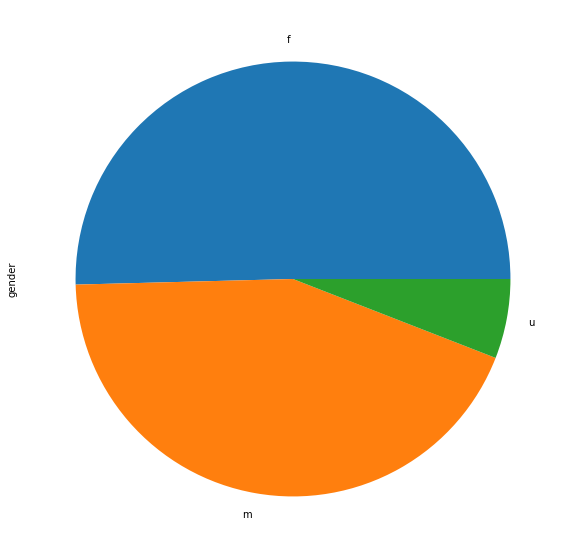

In [11]:
total_data.groupby('gender')['gender'].count().plot.pie(figsize=(10, 10))

## Age Chart 

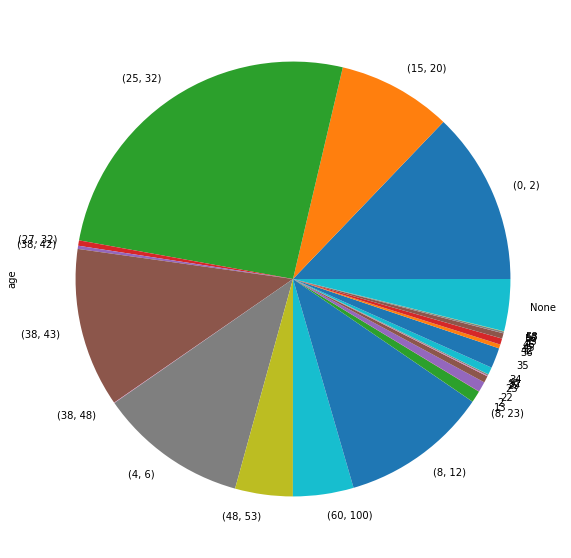

In [12]:
total_data.groupby('age')['age'].count().plot.pie(figsize=(10, 10))

## Explore the data 

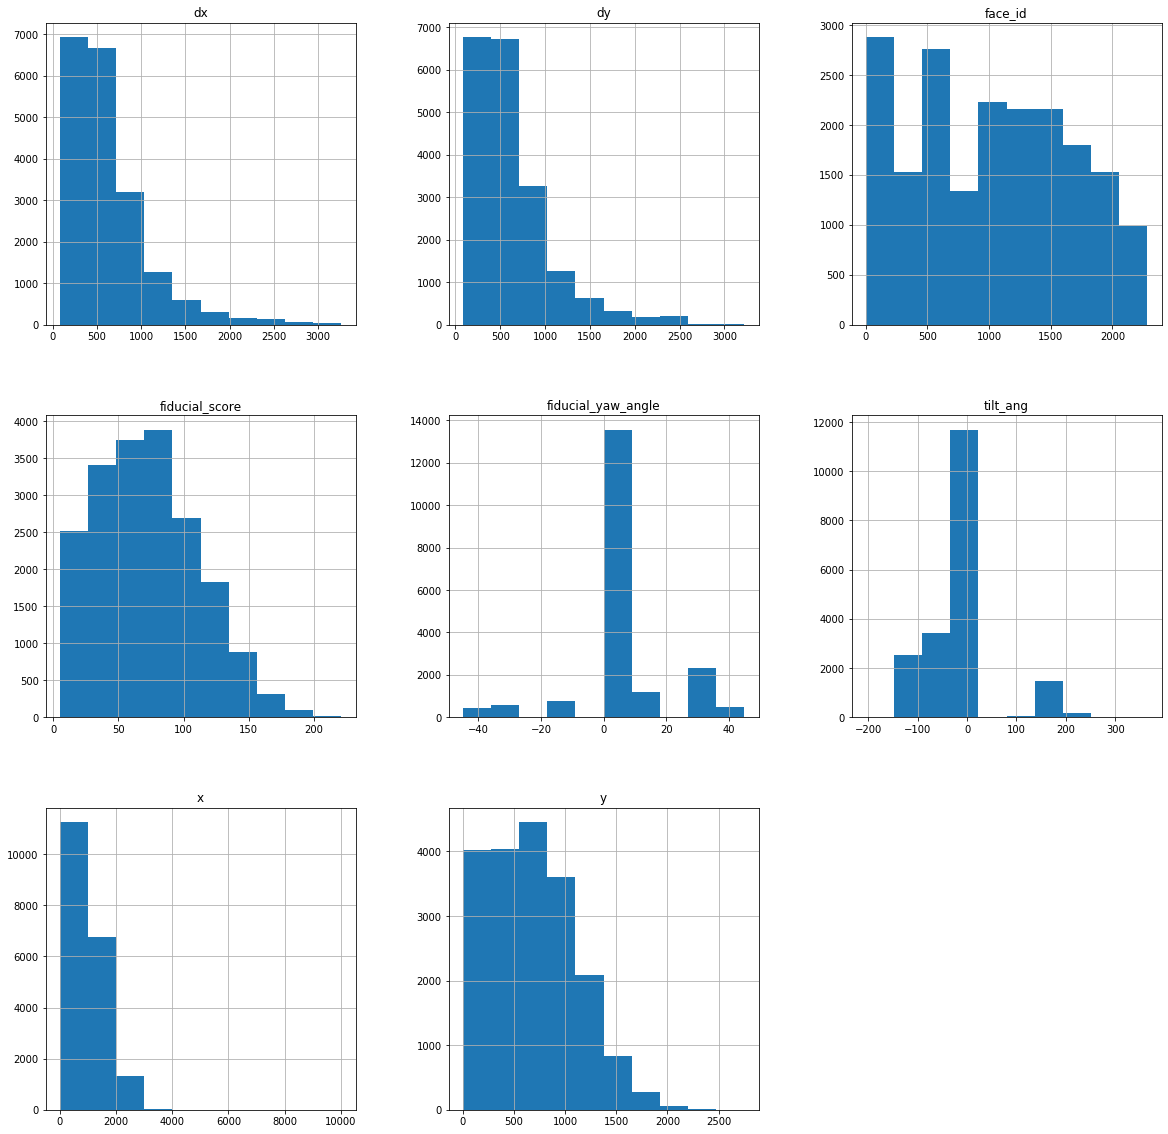

In [13]:
total_data.hist(figsize=(20,20))
plt.show()

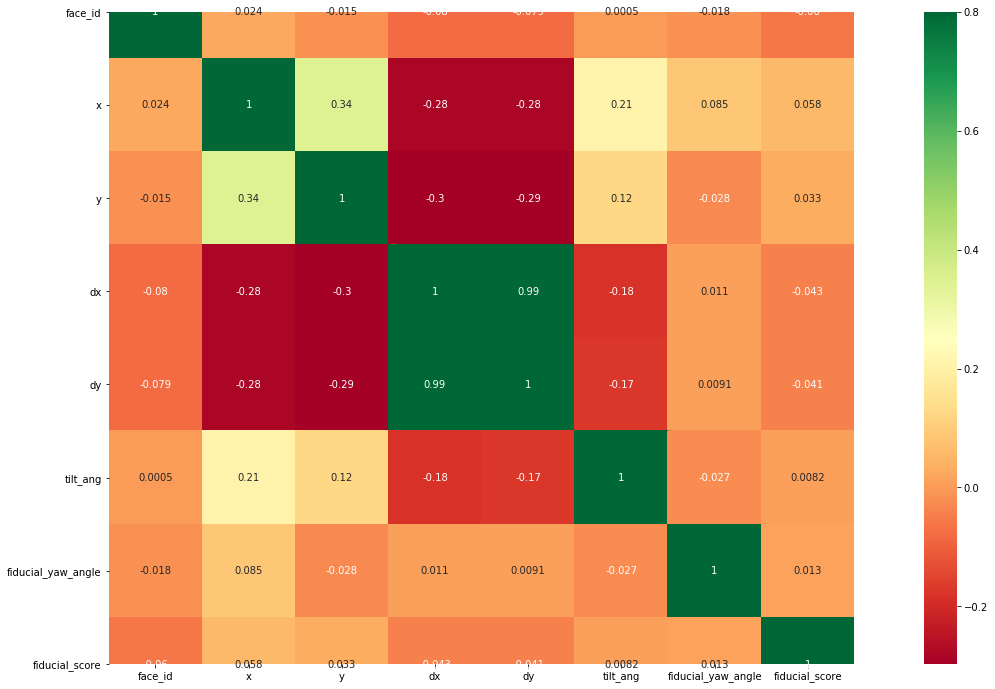

In [14]:
matrix = total_data.corr() 
f, ax = plt.subplots(figsize=(25, 12)) 
sns.heatmap(matrix, vmax=.8, square=True, cmap="RdYlGn",annot = True);

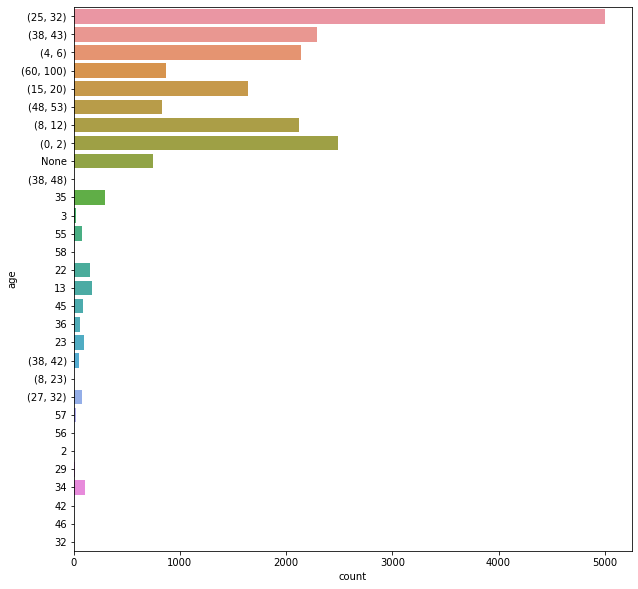

In [15]:
plt.figure(figsize=(10,10))
sns.countplot(y = total_data['age'])

In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

Using TensorFlow backend.


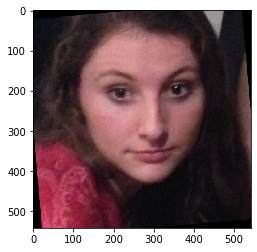

In [18]:
path = r"C:\Users\user\Desktop\Caution\New folder\AdienceBenchmarkGenderAndAgeClassification\faces\10406201@N05\coarse_tilt_aligned_face.273.11457970173_67e220b567_o.jpg"
img = load_img(path)
plt.imshow(img)
plt.show()

In [19]:
imp_data = total_data[['age', 'gender', 'x', 'y', 'dx', 'dy']].copy()
imp_data.info()
img_path = []
for row in total_data.iterrows():
    path = r"C:\Users\user\Desktop\Caution\New folder\AdienceBenchmarkGenderAndAgeClassification\faces\10406201@N05\coarse_tilt_aligned_face.273.11457970173_67e220b567_o.jpg"
    img_path.append(path)
imp_data['img_path'] = img_path
imp_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19370 entries, 0 to 19369
Data columns (total 6 columns):
age       19370 non-null object
gender    18591 non-null object
x         19370 non-null int64
y         19370 non-null int64
dx        19370 non-null int64
dy        19370 non-null int64
dtypes: int64(4), object(2)
memory usage: 908.1+ KB


,age,gender,x,y,dx,dy,img_path
0,"(25, 32)",f,0,414,1086,1383,C:\Users\user\Desktop\Caution\New folder\Adien...
1,"(25, 32)",m,301,105,640,641,C:\Users\user\Desktop\Caution\New folder\Adien...
2,"(25, 32)",f,2395,876,771,771,C:\Users\user\Desktop\Caution\New folder\Adien...
3,"(25, 32)",m,752,1255,484,485,C:\Users\user\Desktop\Caution\New folder\Adien...
4,"(25, 32)",m,175,80,769,768,C:\Users\user\Desktop\Caution\New folder\Adien...


In [20]:
imp_data = imp_data.dropna()
clean_data = imp_data[imp_data.gender != 'u'].copy()
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17492 entries, 0 to 19345
Data columns (total 7 columns):
age         17492 non-null object
gender      17492 non-null object
x           17492 non-null int64
y           17492 non-null int64
dx          17492 non-null int64
dy          17492 non-null int64
img_path    17492 non-null object
dtypes: int64(4), object(3)
memory usage: 1.1+ MB


In [21]:
gender_to_label_map = {
    'f' : 0,
    'm' : 1
}
clean_data['gender'] = clean_data['gender'].apply(lambda g: gender_to_label_map[g])
clean_data.head()

,age,gender,x,y,dx,dy,img_path
0,"(25, 32)",0,0,414,1086,1383,C:\Users\user\Desktop\Caution\New folder\Adien...
1,"(25, 32)",1,301,105,640,641,C:\Users\user\Desktop\Caution\New folder\Adien...
2,"(25, 32)",0,2395,876,771,771,C:\Users\user\Desktop\Caution\New folder\Adien...
3,"(25, 32)",1,752,1255,484,485,C:\Users\user\Desktop\Caution\New folder\Adien...
4,"(25, 32)",1,175,80,769,768,C:\Users\user\Desktop\Caution\New folder\Adien...


In [22]:
clean_data['age'] = clean_data['age'].map({'(25, 32)': 0, '(0, 2)': 1, '(38, 43)': 2, '(4, 6)': 3, '(8, 12)': 4, '(15, 20)': 5, 
                                           '(60, 100)': 6, '(48, 53)': 7, '35': 8, '13': 9, '22': 10, '34': 11, '23': 12, '45': 13, 
                                           '(27, 32)': 14, '55': 15, '36': 16, '(38, 42)': 17, 'None': 18, '57': 19, '3': 20, '29': 21, 
                                           '(38, 48)': 22, '58': 23, '2': 24, '42': 25, '(8, 23)': 26, '46': 27})
clean_data.head()

,age,gender,x,y,dx,dy,img_path
0,0,0,0,414,1086,1383,C:\Users\user\Desktop\Caution\New folder\Adien...
1,0,1,301,105,640,641,C:\Users\user\Desktop\Caution\New folder\Adien...
2,0,0,2395,876,771,771,C:\Users\user\Desktop\Caution\New folder\Adien...
3,0,1,752,1255,484,485,C:\Users\user\Desktop\Caution\New folder\Adien...
4,0,1,175,80,769,768,C:\Users\user\Desktop\Caution\New folder\Adien...


## Evaluate Models

In [23]:
model = Sequential()
model.add(Conv2D(input_shape=(227, 227, 3), filters=96, kernel_size=(7, 7), strides=4, padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(5, 5), strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3, 3), strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=8, activation='softmax'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 56, 56, 96)        14208     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 28, 96)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 256)       614656    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 256)       590080    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 256)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)            